#Time to find Rico, Kowalski, Skipper and Private and save them from New York and back to Antarcitca

In [3]:
# Load the penguins dataset. It requires package 'seaborn'
import seaborn as sns
penguins = sns.load_dataset("penguins").dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


# Feature selection

In [4]:
#Import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Target variable (categorical)
label_encoder = LabelEncoder()
penguins['species_encoded'] = label_encoder.fit_transform(penguins['species'])

#Isolate features
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]
y = penguins['species_encoded']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Normalize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#Create Evaluation Function
def evaluate_model(name, y_true, y_pred, classes, color='Blues'):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n[{name}]")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred, target_names=classes))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=color)
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()
    return acc

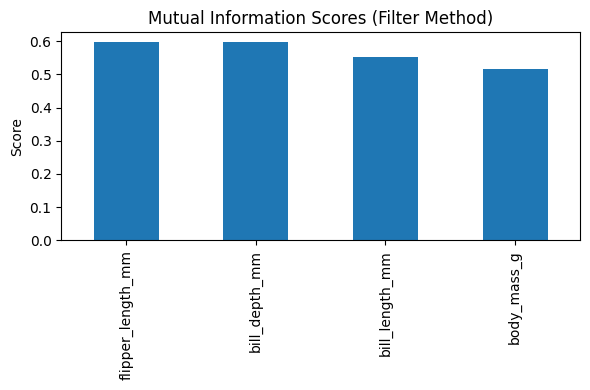


[Filter Method (Mutual Info)]
Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



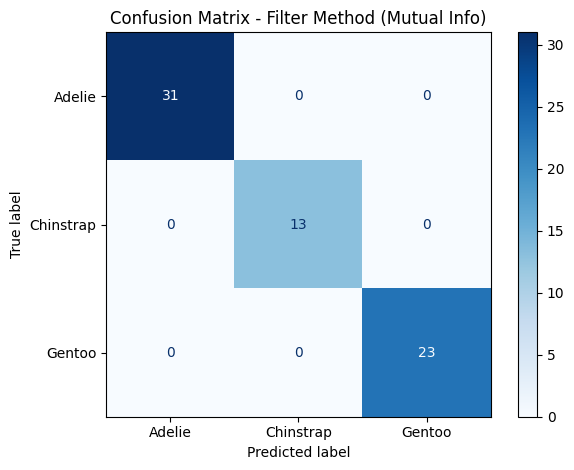

In [7]:
#Filter Method – Mutual Information (Top 3 of 4 Features)
selector_filter = SelectKBest(score_func=mutual_info_classif, k=3)
X_train_filter = selector_filter.fit_transform(X_train, y_train)
X_test_filter = selector_filter.transform(X_test)

#Visualize scores
mi_scores = pd.Series(selector_filter.scores_, index=features)
mi_scores.sort_values(ascending=False).plot(kind='bar', figsize=(6,4))
plt.title("Mutual Information Scores (Filter Method)")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

#Train model
model_filter = LogisticRegression(max_iter=1000)
model_filter.fit(X_train_filter, y_train)
y_pred_filter = model_filter.predict(X_test_filter)
acc_filter = evaluate_model("Filter Method (Mutual Info)", y_test, y_pred_filter, label_encoder.classes_, 'Blues')

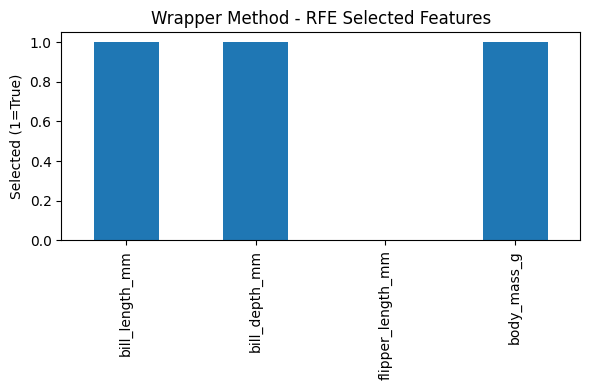


[Wrapper Method (RFE)]
Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



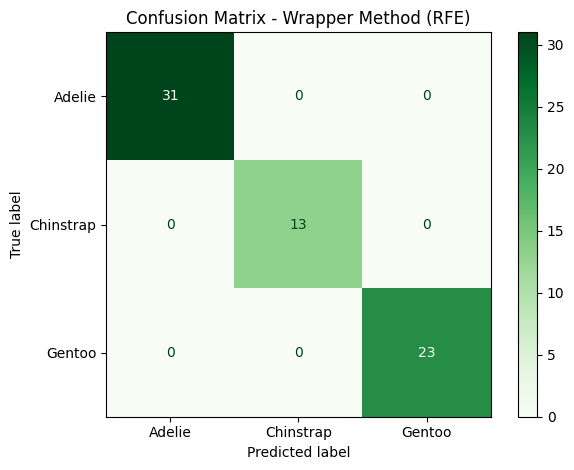

In [8]:
#Wrapper Method – RFE
model_rfe_base = LogisticRegression(max_iter=1000)
rfe = RFE(model_rfe_base, n_features_to_select=3)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

#Visualize selected features
rfe_selected = pd.Series(rfe.support_, index=features)
rfe_selected.map({True: 1, False: 0}).plot(kind='bar', figsize=(6,4))
plt.title("Wrapper Method - RFE Selected Features")
plt.ylabel("Selected (1=True)")
plt.tight_layout()
plt.show()

#Train model
model_rfe = LogisticRegression(max_iter=1000)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
acc_rfe = evaluate_model("Wrapper Method (RFE)", y_test, y_pred_rfe, label_encoder.classes_, 'Greens')


[Embedded Method (Random Forest)]
Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



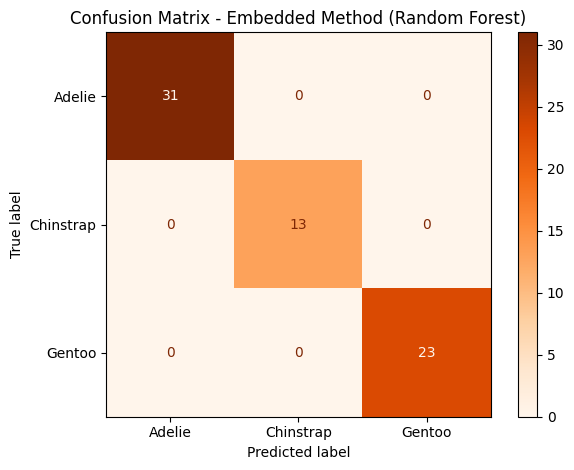

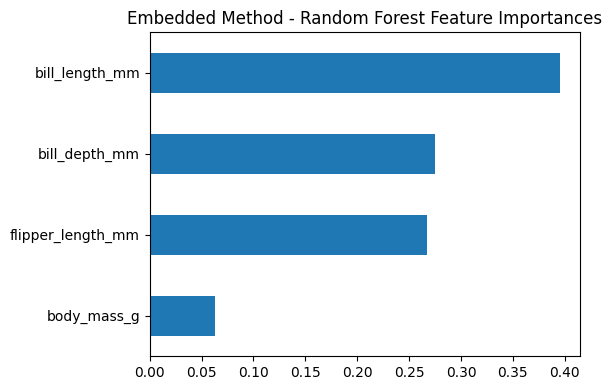

In [9]:
#Embedded Method – Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
acc_rf = evaluate_model("Embedded Method (Random Forest)", y_test, y_pred_rf, label_encoder.classes_, 'Oranges')

#Visualize feature importances
importances = pd.Series(model_rf.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(6,4))
plt.title("Embedded Method - Random Forest Feature Importances")
plt.tight_layout()
plt.show()


[Permutation Importance (RF)]
Accuracy: 1.0000
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



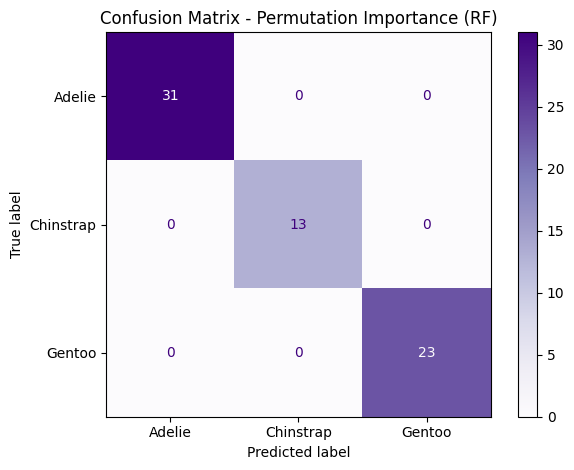


📊 Summary Accuracy Report:
                  Method  Accuracy Score
    Filter (Mutual Info)             1.0
           Wrapper (RFE)             1.0
Embedded (Random Forest)             1.0
  Permutation Importance             1.0


In [10]:
#Accuracy Report
acc_perm = evaluate_model("Permutation Importance (RF)", y_test, y_pred_rf, label_encoder.classes_, 'Purples')
summary_df = pd.DataFrame({
    "Method": [
        "Filter (Mutual Info)",
        "Wrapper (RFE)",
        "Embedded (Random Forest)",
        "Permutation Importance"
    ],
    "Accuracy Score": [acc_filter, acc_rfe, acc_rf, acc_perm]
}).sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)

print("\n📊 Summary Accuracy Report:")
print(summary_df.to_string(index=False))

In [11]:
#Save the chosen model, scaler and label encoder for future use

# Choose which model to save: (pick one of the following lines)
# model_to_save = model_filter
# model_to_save = model_rfe
model_to_save = model_rf


# Save the model, scaler, and encoder
joblib.dump(model_to_save, 'penguin_classifier_model.pkl')
joblib.dump(scaler, 'penguin_scaler.pkl')
joblib.dump(label_encoder, 'penguin_label_encoder.pkl')

print("✅ Model, Scaler, and Label Encoder saved successfully.")

✅ Model, Scaler, and Label Encoder saved successfully.
